In [1]:
!gdown --id 1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Eq0s7oBP00xkPkAAlBt0nj6lNVFvMkhO
To: /content/Precooked_pasta.csv
100% 30.8M/30.8M [00:00<00:00, 83.1MB/s]


In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/content/Precooked_pasta.csv")
df

,Sample_ID,Dry_weight_content_%,Pasta_type_&_phy_con,Phy_con,Pasta_type,350,351,352,353,354,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.273476,0.274664,0.276380,0.278252,0.278817,...,0.029975,0.030175,0.030159,0.029962,0.029791,0.029484,0.029472,0.029682,0.029583,0.029580
1,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.264637,0.265435,0.264751,0.266426,0.266870,...,0.048597,0.048674,0.048668,0.048763,0.048775,0.048688,0.048645,0.048607,0.048330,0.048190
2,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.169046,0.167434,0.169058,0.171890,0.176521,...,0.022955,0.023029,0.023051,0.023055,0.023036,0.023008,0.022918,0.022691,0.022503,0.022539
3,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.251627,0.251486,0.259051,0.262979,0.259674,...,0.040048,0.040046,0.040003,0.039815,0.039703,0.039671,0.039672,0.039642,0.039595,0.039484
4,Mezze Penne (frozen - contact) 01,42.8,Mezze Penne (frozen),Frozen pasta,Mezze Penne,0.161285,0.164613,0.169598,0.167259,0.168154,...,0.052392,0.052348,0.052389,0.052460,0.052475,0.052550,0.052569,0.052479,0.052492,0.052476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.123408,0.119177,0.113905,0.116624,0.121210,...,0.045335,0.045403,0.045501,0.045496,0.045537,0.045849,0.045793,0.045396,0.045128,0.045112
1196,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.125699,0.121910,0.118119,0.118316,0.117574,...,0.043958,0.043743,0.043659,0.043489,0.043563,0.043944,0.044031,0.044185,0.044124,0.043869
1197,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.113928,0.116862,0.119997,0.113773,0.117905,...,0.045205,0.045057,0.045030,0.044883,0.044854,0.045042,0.045063,0.045013,0.044990,0.045082
1198,Pennette 72 (thawed - contact) 06,46.7,Pennette 72 (thawed),Thawed pasta,Pennette 72,0.130362,0.127501,0.128886,0.131551,0.130019,...,0.046510,0.046244,0.046220,0.046381,0.046408,0.046421,0.046486,0.046521,0.046554,0.046563


In [4]:
spectra = df.values[:,5:]
classes = df.values[:,0:1]

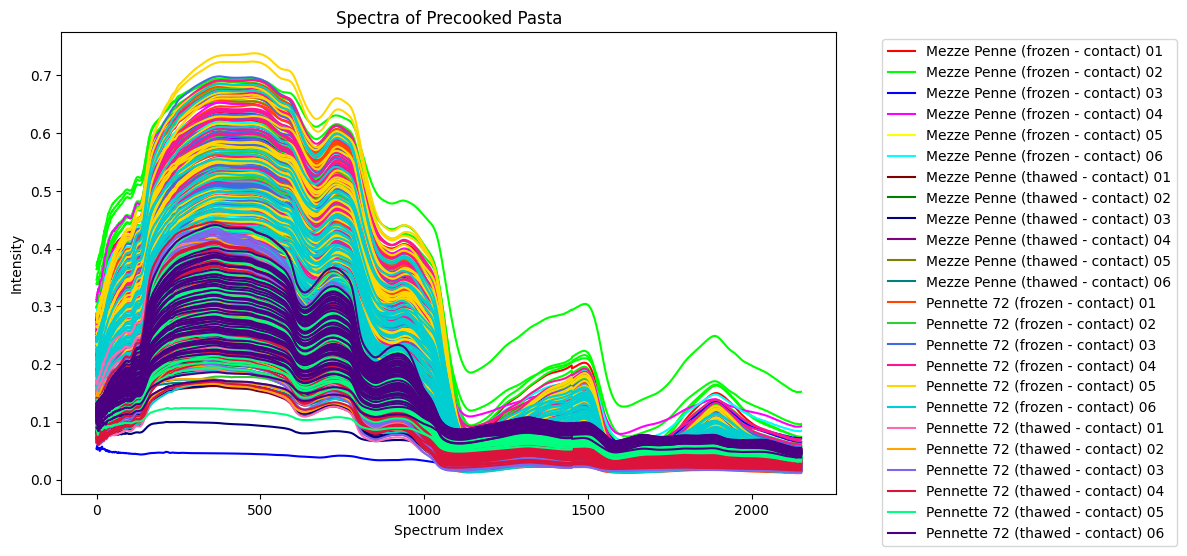

In [5]:
def visualize_spectra(spectra, classes):
    classes = np.array(classes)
    unique_classes = np.unique(classes)
    num_classes = len(unique_classes)

    custom_colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00', '#00FFFF',
                 '#800000', '#008000', '#000080', '#800080', '#808000', '#008080',
                 '#FF4500', '#32CD32', '#4169E1', '#FF1493', '#FFD700', '#00CED1',
                 '#FF69B4', '#FFA500', '#7B68EE', '#DC143C', '#00FF7F', '#4B0082']


    fig = plt.figure(figsize=(10, 6))
    plotted_colors = {}

    for i, class_label in enumerate(unique_classes):
        if class_label not in plotted_colors:
            class_indices = np.where(classes.flatten() == class_label)[0]
            class_spectra = spectra[class_indices]
            color = custom_colors[i % len(custom_colors)]
            plotted_colors[class_label] = color
            label = f'{class_label}'
            plt.plot(class_spectra.T, color=color, label=label)

    plt.xlabel('Spectrum Index')
    plt.ylabel('Intensity')
    plt.title('Spectra of Precooked Pasta')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

visualize_spectra(spectra, classes)


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(classes.flatten())

for label, encoded_label in zip(classes.flatten(), encoded_labels):
    print(label, '-->', encoded_label)

Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0
Mezze Penne (frozen - contact) 01 --> 0


In [7]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pca = PCA(n_components=2)
lda = LinearDiscriminantAnalysis(n_components=2)

pca_result = pca.fit_transform(spectra)
lda_result = lda.fit_transform(spectra, encoded_labels)

print("Kích thước của các thành phần chính sau PCA:")
print(pca_result.shape)

print("Kích thước của các thành phần chính sau LDA:")
print(lda_result.shape)

Kích thước của các thành phần chính sau PCA:
(1200, 2)
Kích thước của các thành phần chính sau LDA:
(1200, 2)


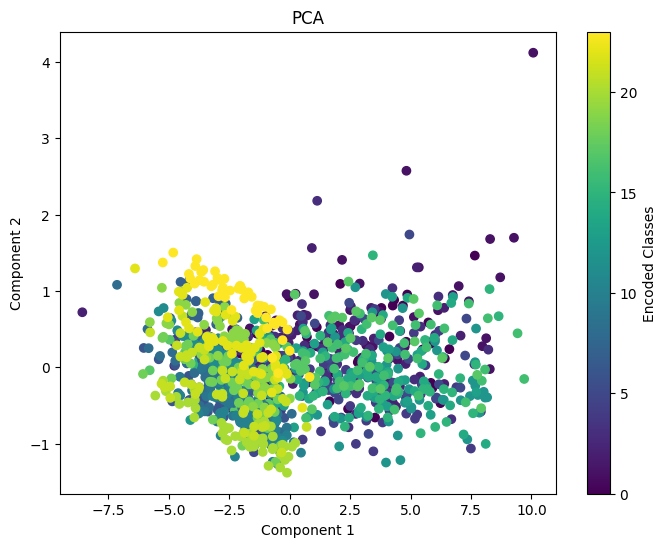

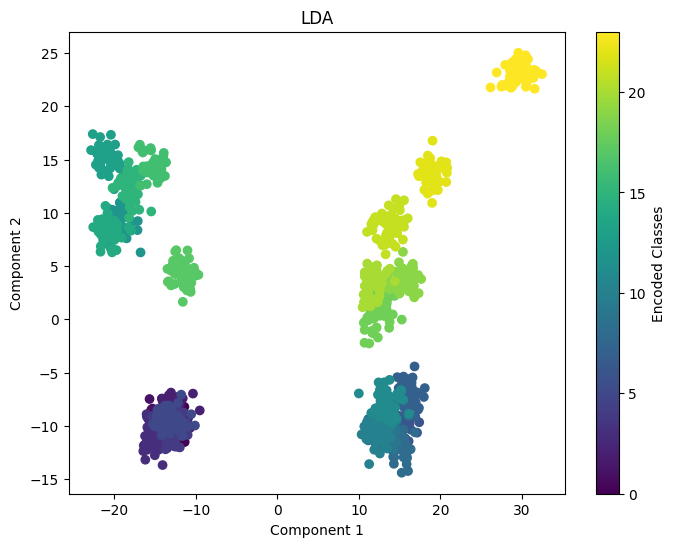

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=encoded_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA')
plt.colorbar(label='Encoded Classes')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=encoded_labels, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LDA')
plt.colorbar(label='Encoded Classes')
plt.show()

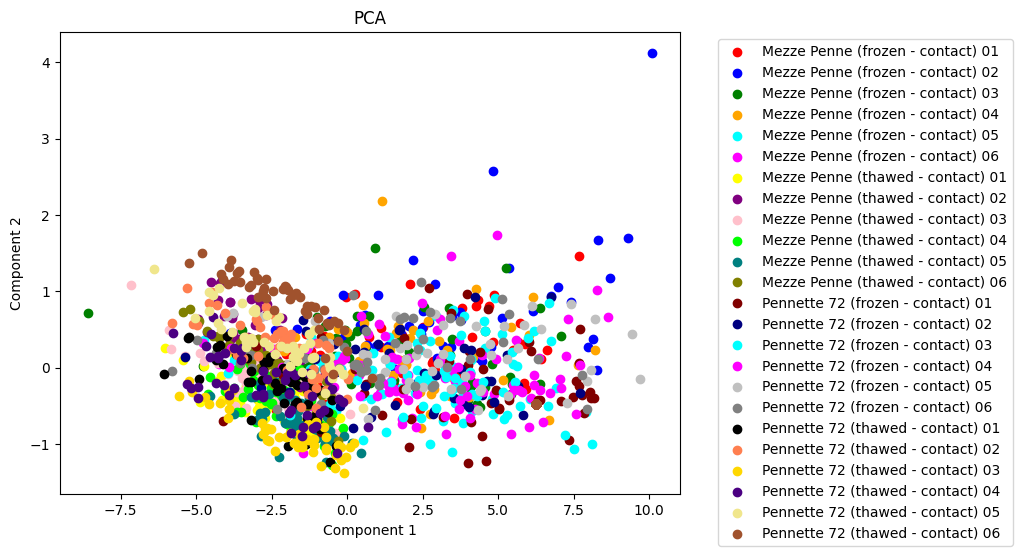

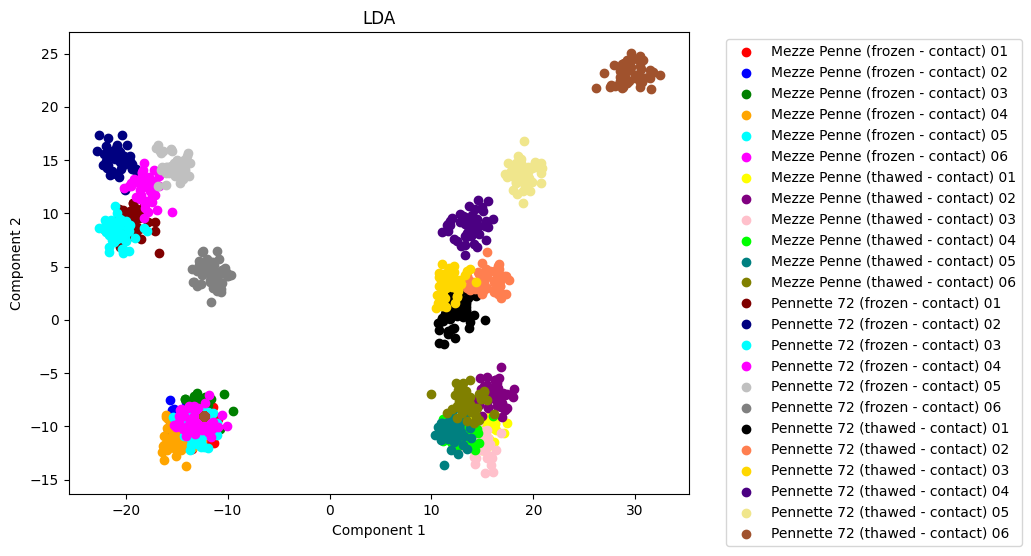

In [9]:
unique_labels = np.unique(classes)

colors = ['red', 'blue', 'green', 'orange', 'cyan', 'magenta', 'yellow', 'purple', 'pink',
          'lime', 'teal', 'olive', 'maroon', 'navy', 'aqua', 'fuchsia', 'silver', 'gray',
          'black', 'coral', 'gold', 'indigo', 'khaki', 'sienna']

num_colors = len(colors)

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    indices = np.where(classes == label)
    color = colors[i % num_colors]
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], c=color, label=f'{label}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    indices = np.where(classes == label)
    color = colors[i % num_colors]
    plt.scatter(lda_result[indices, 0], lda_result[indices, 1], c=color, label=f'{label}')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('LDA')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(lda_result, encoded_labels, test_size=0.2, random_state=2)

In [11]:
import tensorflow as tf

X_train = X_train.astype(float)
X_train = tf.convert_to_tensor(X_train)
y_train = tf.convert_to_tensor(y_train)

X_test = X_test.astype(float)
X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

In [12]:
print(X_train.shape)
print(y_train.shape)

(960, 2)
(960,)


In [13]:
def extract_to_pseudo_image(matrix):
    extract_matrix = matrix[:, 0:1]
    for i in range(2, matrix.shape[1], 2):
        extract_matrix = np.concatenate((extract_matrix, matrix[:, i:i+1]), axis=1)
    extract_matrix = extract_matrix[:, 0:1104]
    extract_matrix = extract_matrix.astype(float)
    num_samples = extract_matrix.shape[0]
    extract_matrix = tf.convert_to_tensor(extract_matrix)
    extract_matrix = tf.reshape(extract_matrix, (num_samples, 48, 23, 1))
    return extract_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(lda_result, encoded_labels, test_size=0.2, random_state=2)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)


In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(960, 2)
(960,)
(240, 2)
(240,)


In [17]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Concatenate, Dense, GlobalAveragePooling2D, Dropout, Reshape


def residual_block(x, filters, dropout_rate=0.2, l2_weight=0.001):
    x1 = Conv2D(kernel_size=1, filters=filters, padding="same")(x)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(dropout_rate)(x1)

    x2 = Conv2D(kernel_size=3, filters=filters, padding="same")(x)
    x2 = BatchNormalization()(x2)
    x2 = ReLU()(x2)
    x2 = Conv2D(kernel_size=3, filters=filters, padding="same")(x2)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(dropout_rate)(x2)

    out = Concatenate()([x1, x2])
    out = ReLU()(out)

    return out

def TeaResnet(dropout_rate=0.2, l2_weight=0.001):
    inputs = Input(shape=(2,))

    x = Reshape((1, 1, 2))(inputs)

    x = Conv2D(kernel_size=7, filters=16, padding="same")(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = residual_block(x, 16, dropout_rate, l2_weight)
    x = residual_block(x, 32, dropout_rate, l2_weight)
    x = residual_block(x, 64, dropout_rate, l2_weight)

    x = GlobalAveragePooling2D()(x)
    x = Dense(24, activation='softmax', kernel_regularizer=l2(l2_weight))(x)

    model = Model(inputs=inputs, outputs=x)
    return model

In [19]:
model_TeaResnet = TeaResnet()

In [20]:
model_TeaResnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 reshape (Reshape)              (None, 1, 1, 2)      0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 1, 1, 16)     1584        ['reshape[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 1, 1, 16)    64          ['conv2d[0][0]']                 
 alization)                                                                                   

In [21]:
model_TeaResnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.utils import to_categorical

def lr_schedule(epoch):
    learning_rate = 0.001
    if epoch > 50:
        learning_rate *= 0.1
    elif epoch > 75:
        learning_rate *= 0.01
    return learning_rate

lr_scheduler = LearningRateScheduler(lr_schedule)

num_classes = 24
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

history = model_TeaResnet.fit(X_train, y_train_encoded, batch_size=32, epochs=2000, validation_data=(X_test, y_test_encoded), callbacks=[lr_scheduler])

loss, accuracy = model_TeaResnet.evaluate(X_test, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/2000
30/30 [==============================] - 18s 41ms/step - loss: 2.7805 - accuracy: 0.1823 - val_loss: 3.1786 - val_accuracy: 0.0958 - lr: 0.0010
Epoch 2/2000
30/30 [==============================] - 0s 16ms/step - loss: 2.1023 - accuracy: 0.3010 - val_loss: 3.1241 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/2000
30/30 [==============================] - 0s 10ms/step - loss: 1.8039 - accuracy: 0.3823 - val_loss: 3.0556 - val_accuracy: 0.1125 - lr: 0.0010
Epoch 4/2000
30/30 [==============================] - 0s 11ms/step - loss: 1.7308 - accuracy: 0.3688 - val_loss: 2.9489 - val_accuracy: 0.1208 - lr: 0.0010
Epoch 5/2000
30/30 [==============================] - 0s 12ms/step - loss: 1.5769 - accuracy: 0.4094 - val_loss: 2.8162 - val_accuracy: 0.1708 - lr: 0.0010
Epoch 6/2000
30/30 [==============================] - 0s 10ms/step - loss: 1.5180 - accuracy: 0.4187 - val_loss: 2.5916 - val_accuracy: 0.2042 - lr: 0.0010
Epoch 7/2000
30/30 [==============================] - 0s 10ms/s